In [2]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1=pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df1.shape

(541909, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


### Data cleaning and handling missing value

In [8]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [13]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [14]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [15]:
most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [16]:
most_freq.columns=["StockCode","freq_Description","count"]

df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [17]:
df2['Description']=df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [18]:
df2.dropna(subset=['Description'], inplace=True)

df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171076
Country,0
freq_Description,0
count,0


In [19]:
df2.drop(columns=['freq_Description', 'count'], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710919.000000,710919,710919.000000,539843.000000
mean,9.718405,2011-07-05 11:53:55.375253248,4.410160,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114446,NaN,84.525607,1709.392583


In [21]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
196,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
209,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
304,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
305,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
306,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
710559,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
710781,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
710782,C581568,21258,?,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
710783,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [22]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [23]:
df3 = df2[ (df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693945.000000,693945,693945.000000,527365.000000
mean,10.873889,2011-07-05 15:59:13.143203328,3.874301,15296.797165
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669424,NaN,31.507544,1708.785281


In [24]:
df3.Quantity.quantile(0.9999)

np.float64(1530.1399999973364)

In [25]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6336,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6472,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33829,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
42702,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
68298,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
672274,579498,23084,add stock to allocate online orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672275,579498,23084,allocate stock for dotcom orders ta,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672276,579498,23084,for online retail orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672277,579498,23084,temp adjustment,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


Feature Enginnering to create new columns for analaysing

In [26]:
df4 = df3.copy()
df4['TotalPrice'] = df4['Quantity'] * df4['UnitPrice']
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
2,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693945 entries, 0 to 711030
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    693945 non-null  string        
 1   StockCode    693945 non-null  string        
 2   Description  693945 non-null  string        
 3   Quantity     693945 non-null  int64         
 4   InvoiceDate  693945 non-null  datetime64[ns]
 5   UnitPrice    693945 non-null  float64       
 6   CustomerID   527365 non-null  float64       
 7   Country      693945 non-null  string        
 8   TotalPrice   693945 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 52.9 MB


In [28]:
df4['Month']=df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
344547,560096,48185,?,4,2011-07-14 17:20:00,7.95,13538.0,United Kingdom,31.80,7
498445,569726,22537,MAGIC DRAWING SLATE DINOSAUR,24,2011-10-06 09:36:00,0.42,17419.0,United Kingdom,10.08,10
151482,546399,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2011-03-11 14:58:00,2.95,14352.0,United Kingdom,17.70,3
497677,569694,22950,36 DOILIES VINTAGE CHRISTMAS,12,2011-10-05 15:24:00,1.45,17735.0,United Kingdom,17.40,10
255152,553890,22386,JUMBO BAG PINK POLKADOT,2,2011-05-19 16:32:00,4.13,NaN,United Kingdom,8.26,5


Visualization and EDA

1. Plot Monthly sales

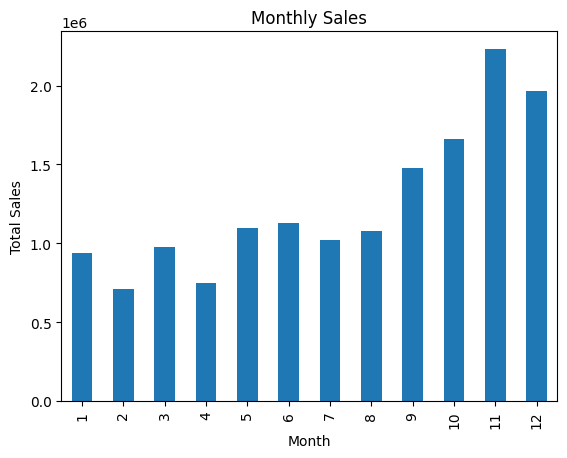

In [29]:
monthly_sales = df4.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Insight:

The total sales show a general upward trend throughout the year, with a significant peak in the later months.

#### 2. Top 5 Countries by sales

In [30]:
country_sales = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_5_countries = country_sales.head(5)
top_5_countries


,TotalPrice
Country,
United Kingdom,1.269449e+07
Netherlands,4.316229e+05
EIRE,3.937788e+05
Germany,3.051400e+05
France,3.028098e+05


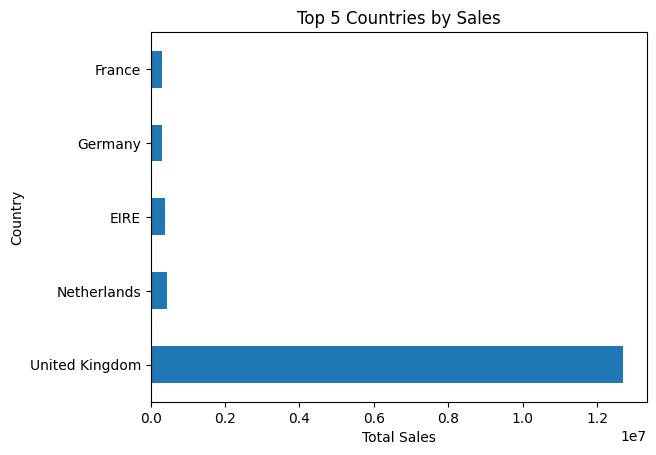

In [31]:
top_5_countries.plot(kind='barh', title='Top 5 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

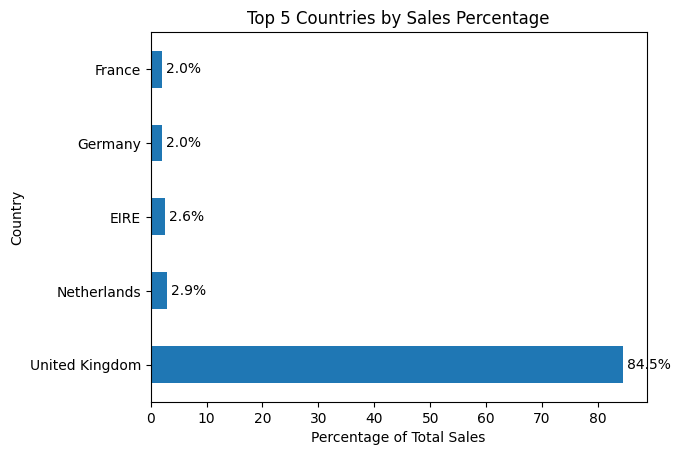

In [32]:
total_sales_all_countries = country_sales.sum()
top_5_countries_percentage = (top_5_countries / total_sales_all_countries) * 100


ax = top_5_countries_percentage.plot(kind='barh', title='Top 5 Countries by Sales Percentage')
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()


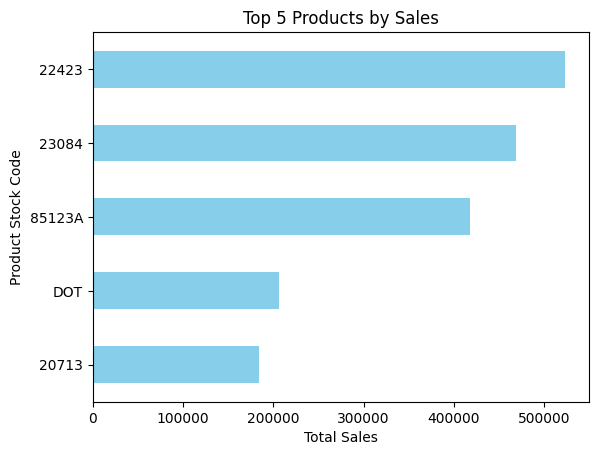

In [33]:
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()
top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Sales')
plt.gca().invert_yaxis()
plt.show()

In [34]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
2364,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3927,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
7143,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
7268,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
7450,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
704672,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
705202,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
707914,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
709774,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [35]:
for StockCode in top_5_products.index:
    description = df4[df4.StockCode==StockCode].Description.mode()[0]
    print(f"StockCode: {StockCode}, Description: {description}")

StockCode: 22423, Description: REGENCY CAKESTAND 3 TIER
StockCode: 23084, Description: Amazon
StockCode: 85123A, Description: ?
StockCode: DOT, Description: DOTCOM POSTAGE
StockCode: 20713, Description: Found


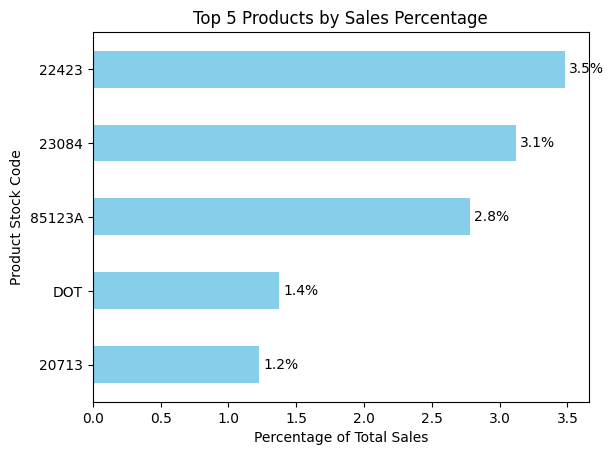

In [36]:
# prompt: plot same chart as above for product sales but use percentage this time. show % in the bar

total_sales_all_products = product_wise_sales.sum()
top_5_products_percentage = (top_5_products / total_sales_all_products) * 100


ax = top_5_products_percentage.plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Sales Percentage')
plt.gca().invert_yaxis()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)


plt.show()

#### 4. RFM Analysis

In [38]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [40]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,227,5971.21
12348.0,75,34,1930.44
12349.0,19,92,2165.86
12350.0,310,19,364.40


In [46]:
df4[df4.CustomerID==12347]["TotalPrice"].sum()

np.float64(5971.210000000001)

In [47]:
# segment customer based on RFM

rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[ 4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

rfm


,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,227,5971.21,4,4,4,12
12348.0,75,34,1930.44,2,2,3,7
12349.0,19,92,2165.86,3,3,3,9
12350.0,310,19,364.40,1,1,1,3
...,...,...,...,...,...,...,...
18280.0,278,12,211.20,1,1,1,3
18281.0,181,12,160.92,1,1,1,3
18282.0,8,17,269.97,4,1,1,6


In [48]:
#customer with highest rfm score
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12362.0,3,330,6374.86,4,4,4,12
15194.0,3,406,10150.04,4,4,4,12
15271.0,7,344,3385.22,4,4,4,12
15218.0,11,253,8991.13,4,4,4,12
15298.0,2,256,7658.92,4,4,4,12
...,...,...,...,...,...,...,...
12350.0,310,19,364.40,1,1,1,3
12977.0,156,9,39.24,1,1,1,3
17639.0,276,8,128.40,1,1,1,3


#### 5. Customer Churn Analysis

In [49]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12


In [51]:
#create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase.head(10)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
12352.0,2011-11-03 14:37:00
12353.0,2011-05-19 17:47:00
12354.0,2011-04-21 13:11:00
12355.0,2011-05-09 13:49:00


In [52]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(10)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310
12352.0,36
12353.0,204
12354.0,232
12355.0,214


In [53]:
#let churn threshold be 90 days
churn_threshold = 90
churn_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churn_customers.head(10)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214
12361.0,287
12363.0,110
12365.0,291
12373.0,311


Number of customers who have not purchased for the last 90 days: 1449


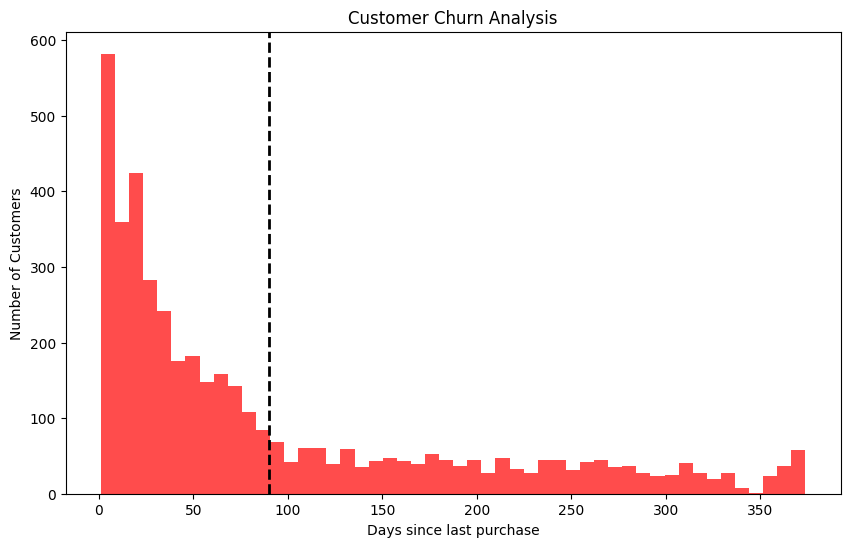

In [55]:
print(f"Number of customers who have not purchased for the last {churn_threshold} days: {len(churn_customers)}")
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(x=churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Analysis')
plt.show()

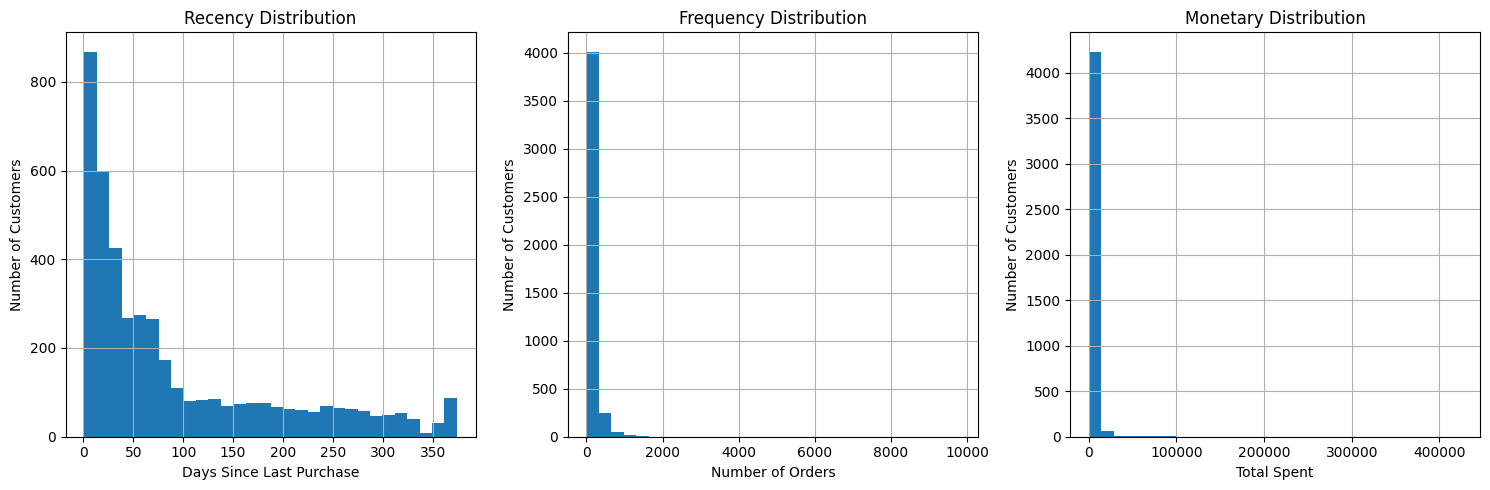

In [59]:

plt.figure(figsize=(15, 5))

# Recency Distribution
plt.subplot(1, 3, 1)
rfm['Recency'].hist(bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')

# Frequency Distribution
plt.subplot(1, 3, 2)
rfm['Frequency'].hist(bins=30)
plt.title('Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')

# Monetary Distribution
plt.subplot(1, 3, 3)
rfm['Monetary'].hist(bins=30)
plt.title('Monetary Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()